## <네이버에서 News Data를 수집한 후 worldcloud 그리기>

### *필수 구현 요소와 체크할 부분은 ▶로 표시했습니다.*

In [1]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')


## 스크래핑
### 첫 페이지부터 원하는 페이지 까지 뉴스 헤드라인을 스크래핑하는 함수 정의


<span style="color:blue">

## ▶ 입력된 페이지 수만큼 기사 헤드라인 검색 및 수집
## ▶ (3) start += 에서 10 씩 증가해야 한다는 점
    
</span>


<span style="color:blue">
    
### 추가: 네이버 뉴스 스크래핑 관련하여 수정사항
    
</span>

* 다음과 달리 네이버 뉴스의 경우, url에서 다음 페이지로 이동할 때마다 10씩 증가하고 있음
    * url에서 start 부분에 1페이지는 1, 2페이지는 11, 3페이지는 21로 표현되고 있음


* 그리하여 아래와 같은 수식을 함수에 넣어 마지막 페이지를 10으로 입력할 때, 실제 url에는 91이 입력되도록 함
    * end = (end-1)*10 + 1

In [2]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 

title_list = []

def web_scraping(keyword, end, start = 1):    # 시작 페이지의 default 값은 1 (즉, 첫 페이지 부터 시작) 
    
    # 네이버 뉴스 url의 특성을 고려하여 추가된 수식
    end = (end-1)*10 + 1
        
    while 1:

        if start > end :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query={0}&start={1}'.format(keyword,start)

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.find_all(attrs='news_tit')     # 헤드라인 기사를 가져옴
        
        print(titles)       # 추출한 헤드라인을 확인

        for one in titles:
            title_list.append(one.text)
            
        start += 10

### 위 함수를 호출

<span style="color:blue">
    
## ▶ “특정 검색어” & “ 마지막 페이지 ” 입력 받기
    
</span>

In [3]:
# 검색어와 마지막 페이지 번호를 입력 받음 

keyword = input('검색어를 입력하세요 : ')
print()

검색어를 입력하세요 : 인공지능



<span style="color:blue">

## ▶ (2) 페이지 입력 받을 때 integer 로 변환
    
</span>

In [4]:
end_page = int(input('마지막 페이지 번호를 입력하세요 : '))

web_scraping(keyword, end_page)       # end_page 페이지 까지 스크래핑을 해온다.

마지막 페이지 번호를 입력하세요 : 10
[<a class="news_tit" href="http://www.newspim.com/news/view/20210426000211" onclick="return goOtherCR(this, 'a=nws*b.tit&amp;r=1&amp;i=88000394_000000000000000001797627&amp;g=5002.0001797627&amp;u='+urlencode(this.href));" target="_blank" title="한컴인텔리전스·곰앤컴퍼니, 인공지능 분야 업무협약">한컴인텔리전스·곰앤컴퍼니, <mark>인공지능</mark> 분야 업무협약</a>, <a class="news_tit" href="http://yna.kr/AKR20210426106400054?did=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=880000D8_000000000000000012354296&amp;g=001.0012354296&amp;u='+urlencode(this.href));" target="_blank" title="광주 광산구·SKT, 코로나19 방역에 인공지능 활용">광주 광산구·SKT, 코로나19 방역에 <mark>인공지능</mark> 활용</a>, <a class="news_tit" href="http://www.etnews.com/20210426000149" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=9&amp;i=880000EA_000000000000000002941262&amp;g=030.0002941262&amp;u='+urlencode(this.href));" target="_blank" title="YBM넷, 인공지능(AI) 기반 원격시험감독 서비스 출시">YBM넷, <mark>인공지능</mark>(AI) 기반 원격시험감독 서비스 출시</a>, <a class="news_tit" 

In [5]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list)) #10pg니까 100개 쌓인다

100


In [6]:
title_list

['한컴인텔리전스·곰앤컴퍼니, 인공지능 분야 업무협약',
 '광주 광산구·SKT, 코로나19 방역에 인공지능 활용',
 'YBM넷, 인공지능(AI) 기반 원격시험감독 서비스 출시',
 '한컴인텔리전스, 곰앤컴퍼니와 인공지능 분야 업무협약',
 "전북교육청, 인공지능 초등수업 '똑똑! 수학 탐험대' 도입",
 "전북교육청 인공지능 활용 초등수학수업 '똑똑! 수학 탐험대' 지원",
 '광주 인공지능 자율주행 인재양성 요람으로, 이용섭 미래차 중심 원해',
 '인공지능 사서·드론 배송…30년후 도서관 둘러보세요(종합)',
 '단국대, 학생들에게 인공지능 비서 제공',
 '단국대, 인공지능 비서 ‘단아이’ 제공',
 '광주 광산구·SKT, 코로나19 방역에 인공지능 활용',
 '초중고 인공지능 교육 솔루션 큐로AI, 창업가를 키운다',
 '현대重그룹, 인공지능 기반 화재 감시시스템 개발',
 '광주 인공지능 자율주행 인재양성 요람으로, 이용섭 미래차 중심 원해',
 '인공지능 기술, 지역사회 문제 해결에 활용',
 'YBM넷, 인공지능(AI) 기반 원격시험감독 서비스 출시',
 '인하대 인천 최초의 인공지능특화 연구교육기관 열어',
 '대전정보문화산업진흥원-모두의연구소, 대전 인공지능 산업 육성 MOU',
 '인공지능(AI)의 기술의 핵심, 학습용 데이터 라벨링 시장을 선도하는 ‘㈜데이...',
 '한컴인텔리전스, 곰앤컴퍼니와 인공지능 분야 업무협약',
 '인천에 인공지능융합연구센터 설립',
 'YBM넷, 인공지능 기반 원격시험감독 서비스 출시',
 "인공지능·SW 인재 발굴 `어깨동무'",
 '[국제인공지능대전 2021] 국제인공지능대전에서 엿본 자율주행의 미래',
 '[국제인공지능대전 2021] 효율적인 제조공정을 위한 솔루션, 인이지&뉴로클',
 '"인공지능 강국 외치지만…한국 AI기술, 선진국에 1.8년 뒤져"',
 '[경상시론]인공지능에 가해질 수 있는 악의적 공격',
 '[국제인공지능대전 2021] ETRI, AI로 치안 민원응대하고 범죄 위험도 예측한다'

## (3) 데이터 분석 단계


### 형태소 분석

In [7]:
# 형태소 분석

kkma = Kkma()

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

print(sentences_tag)

[[('한컴', 'NNG'), ('인텔리', 'NNG'), ('전', 'NNG'), ('슬', 'VA'), ('·', 'SP'), ('곰', 'NNG'), ('앤', 'NNG'), ('컴퍼니', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('분야', 'NNG'), ('업무', 'NNG'), ('협약', 'NNG')], [('광주', 'NNG'), ('광산구', 'NNP'), ('·', 'SP'), ('SKT', 'OL'), (',', 'SP'), ('코로나', 'NNG'), ('19', 'NR'), ('방역', 'NNG'), ('에', 'JKM'), ('인공지능', 'NNG'), ('활용', 'NNG')], [('YBM', 'OL'), ('넷', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('(', 'SS'), ('AI', 'OL'), (')', 'SS'), ('기반', 'NNG'), ('원격', 'NNG'), ('시험', 'NNG'), ('감독', 'NNG'), ('서비스', 'NNG'), ('출시', 'NNG')], [('한컴', 'NNG'), ('인텔리', 'NNG'), ('전', 'NNG'), ('슬', 'VA'), (',', 'SP'), ('곰', 'NNG'), ('앤', 'NNG'), ('컴퍼니', 'NNG'), ('와', 'JKM'), ('인공지능', 'NNG'), ('분야', 'NNG'), ('업무', 'NNG'), ('협약', 'NNG')], [('전', 'NNG'), ('북', 'NNG'), ('교육청', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('초등', 'NNG'), ('수업', 'NNG'), ("'", 'SS'), ('똑', 'MAG'), ('똑', 'MAG'), ('!', 'SF'), ('수학', 'NNG'), ('탐험대', 'NNG'), ("'", 'SS'), ('도입', 'NNG')], [('전', 'NNG'), ('북', 'NNG'), ('교육청', '

### 명사 추출

In [8]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence: #word와 tag 중에서 word 단어만
        if tag in ['NNG']:               
            noun_list.append(word)
            
print(noun_list)


['한컴', '인텔리', '전', '곰', '앤', '컴퍼니', '인공지능', '분야', '업무', '협약', '광주', '코로나', '방역', '인공지능', '활용', '넷', '인공지능', '기반', '원격', '시험', '감독', '서비스', '출시', '한컴', '인텔리', '전', '곰', '앤', '컴퍼니', '인공지능', '분야', '업무', '협약', '전', '북', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '전', '북', '교육청', '인공지능', '활용', '초등', '수학', '수업', '수학', '탐험대', '지원', '광주', '인공지능', '자율', '주행', '인재', '양성', '요람', '미래', '차', '중심', '인공지능', '사서', '론', '배송', '후', '도서관', '종합', '단국', '대', '학생', '인공지능', '비서', '제공', '단국', '대', '인공지능', '비서', '아이', '제공', '광주', '코로나', '방역', '인공지능', '활용', '중고', '인공지능', '교육', '솔루션', '큐', '창업', '가', '현대', '그룹', '인공지능', '기반', '화재', '감시', '시스템', '개발', '광주', '인공지능', '자율', '주행', '인재', '양성', '요람', '미래', '차', '중심', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용', '넷', '인공지능', '기반', '원격', '시험', '감독', '서비스', '출시', '인', '하대', '인천', '최초', '인공지능', '특화', '연구', '교육', '기관', '대전', '정보', '문화', '산업', '진흥원', '모두', '연구소', '대전', '인공지능', '산업', '육성', '인공지능', '의', '기술', '핵심', '학습', '데이터', '라벨', '링', '시장', '선도', '데이', '한컴', '인텔리', '전', 

### 두음절 이상 단어만 추출

In [9]:
# 명사 중에서 두음절 단어만 추출 


print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출


print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 



▶ 전체 명사의 수 =  795

▶ 두음절 이상의 명사의 수 =  687

['한컴', '인텔리', '컴퍼니', '인공지능', '분야', '업무', '협약', '광주', '코로나', '방역', '인공지능', '활용', '인공지능', '기반', '원격', '시험', '감독', '서비스', '출시', '한컴', '인텔리', '컴퍼니', '인공지능', '분야', '업무', '협약', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '교육청', '인공지능', '활용', '초등', '수학', '수업', '수학', '탐험대', '지원', '광주', '인공지능', '자율', '주행', '인재', '양성', '요람', '미래', '중심', '인공지능', '사서', '배송', '도서관', '종합', '단국', '학생', '인공지능', '비서', '제공', '단국', '인공지능', '비서', '아이', '제공', '광주', '코로나', '방역', '인공지능', '활용', '중고', '인공지능', '교육', '솔루션', '창업', '현대', '그룹', '인공지능', '기반', '화재', '감시', '시스템', '개발', '광주', '인공지능', '자율', '주행', '인재', '양성', '요람', '미래', '중심', '인공지능', '기술', '지역', '사회', '문제', '해결', '활용']


### 추출된 단어들의 출현 횟수를 확인

In [10]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출

print(words)


[('인공지능', 100), ('광주', 16), ('분야', 10), ('기술', 10), ('서비스', 8), ('데이터', 8), ('교육', 7), ('시스템', 7), ('협약', 6), ('기반', 6), ('현대', 6), ('그룹', 6), ('대전', 6), ('영입', 6), ('업무', 5), ('교육청', 5), ('지원', 5), ('인재', 5), ('개발', 5), ('연구', 5), ('산업', 5), ('센터', 5), ('청년', 5), ('한컴', 4), ('인텔리', 4), ('활용', 4), ('자율', 4), ('주행', 4), ('미래', 4), ('제공', 4), ('특화', 4), ('국제', 4), ('협회', 4), ('교수', 4), ('자문', 4), ('위원', 4), ('투자', 4), ('선정', 4), ('생태계', 4), ('컴퍼니', 3), ('원격', 3), ('시험', 3), ('감독', 3), ('출시', 3), ('수학', 3), ('양성', 3), ('중심', 3), ('학생', 3), ('솔루션', 3), ('하대', 3)]


<span style="color:blue">

## ▶ 수집한 단어를 출현 빈도에 근거하여 키워드의 word cloud 그리기

</span>

{'인공지능': 100, '광주': 16, '분야': 10, '기술': 10, '서비스': 8, '데이터': 8, '교육': 7, '시스템': 7, '협약': 6, '기반': 6, '현대': 6, '그룹': 6, '대전': 6, '영입': 6, '업무': 5, '교육청': 5, '지원': 5, '인재': 5, '개발': 5, '연구': 5, '산업': 5, '센터': 5, '청년': 5, '한컴': 4, '인텔리': 4, '활용': 4, '자율': 4, '주행': 4, '미래': 4, '제공': 4, '특화': 4, '국제': 4, '협회': 4, '교수': 4, '자문': 4, '위원': 4, '투자': 4, '선정': 4, '생태계': 4, '컴퍼니': 3, '원격': 3, '시험': 3, '감독': 3, '출시': 3, '수학': 3, '양성': 3, '중심': 3, '학생': 3, '솔루션': 3, '하대': 3}


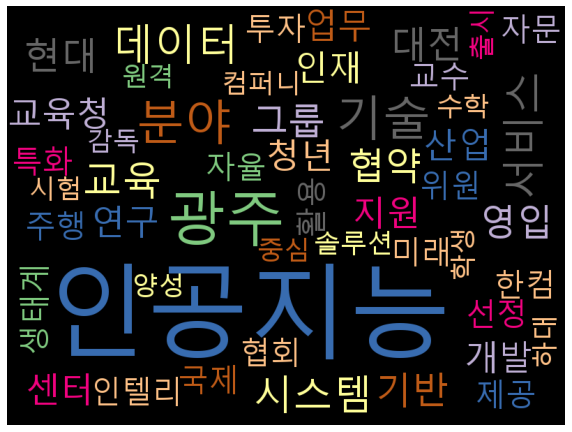

In [11]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()
